In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

%config InlineBackend.figure_format = 'retina'

In [2]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [176]:
#Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()["MPG"]
avg_wgt = df_cars.groupby("CYL").mean()["WGT"]

#Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby("WGT").mean()["MPG"]

#Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())

#Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars["CYL"] == 4]['MPG'].values
cyl6 = df_cars[df_cars['CYL'] == 6]['MPG'].values
cyl8 = df_cars[df_cars['CYL'] == 8]['MPG'].values

## Text Attributes

Text can have multiple useful attributes: 
- position: the top of the graph is the title; axes are on the bottom and left (and possibly right)
- color: It's possible to make certain words pop out nicely
- size: the title should be bigger than the axes labels, for example. 
- font: for mathematics, often italics make sense; Some people prefer times Roman
- angle: rarely used but to make a graph using words that undulates up and down instead of a line plot

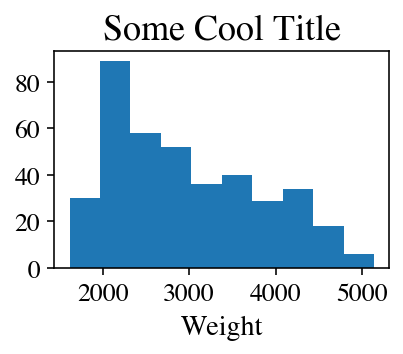

In [19]:
fig, ax = plt.subplots(figsize = (3, 2))

ax.hist(df_cars["WGT"])
ax.set_xlabel("Weight", fontsize = 14, fontname="Times")
ax.set_title("Some Cool Title", fontsize = 18, fontname = "Times")
#ax.tick_params(axis = 'both', labelsize = 13)

#ax.set_xticks([2000, 4000])
#ax.set_xtickslabels(['big', 'small'])
#ax.set_xlim(0, 10000)

for tick in ax.get_xticklabels(): 
    tick.set_fontname("Times")
    tick.set_fontsize(13)
for tick in ax.get_yticklabels(): 
    tick.set_fontname("Times")
    tick.set_fontsize(13)
    
plt.show()

## Color

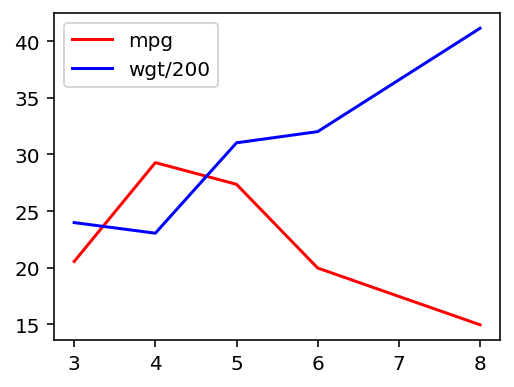

In [22]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.plot(cyl, avg_mpg, c = 'red', label = 'mpg')
ax.plot(cyl, avg_wgt / 100, c = 'blue', label='wgt/200')

plt.legend()
plt.show()

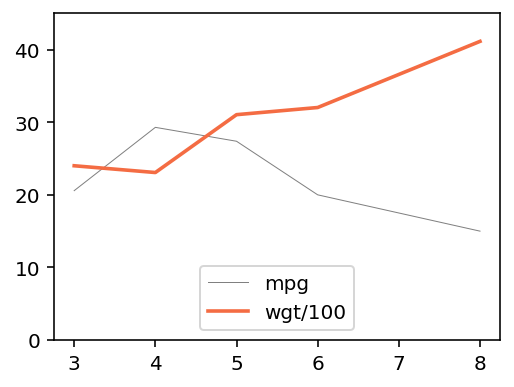

In [29]:
fig, ax = plt.subplots(figsize = (4, 3))

#how to make one line stand out with color and thickness (use lw and color)
ax.plot(cyl, avg_mpg, lw = 0.5, c = 'grey', label = 'mpg')
ax.plot(cyl, avg_wgt/100, lw = 1.8, c = '#F46C43', label = 'wgt/100')

ax.set_ylim(0,45)
plt.legend(loc = 'lower center')

plt.show()

## Exercise 1

In [30]:
x = np.linspace(0, 10, num = 100)
y1 = 3 * np.sin(x)
y2 = np.cos(3 * x)

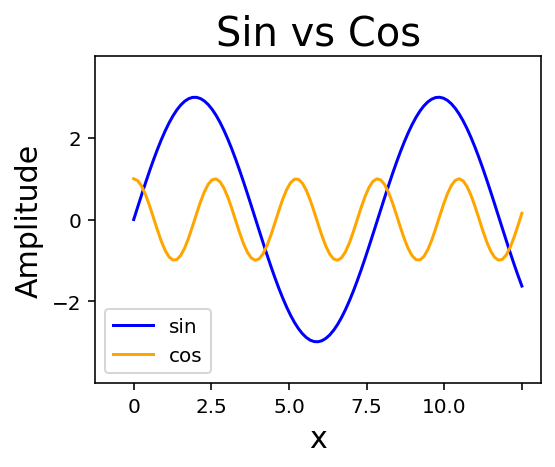

In [50]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.set_ylim(-4, 4)
ax.set_xticklabels([3, 0, 2.5, 5.0, 7.5, 10.0])
ax.set_yticks([-2, 0, 2])
ax.set_xlim(-1, 10.5)
ax.set_ylabel("Amplitude", fontsize = 15)
ax.set_xlabel("x", fontsize = 15)
ax.set_title("Sin vs Cos", fontsize = 20)
ax.plot(x, y1, c = "blue", label = "sin")
ax.plot(x, y2, c = "orange", label = "cos")

plt.legend()
plt.show()

## Playing with Scatter Plots

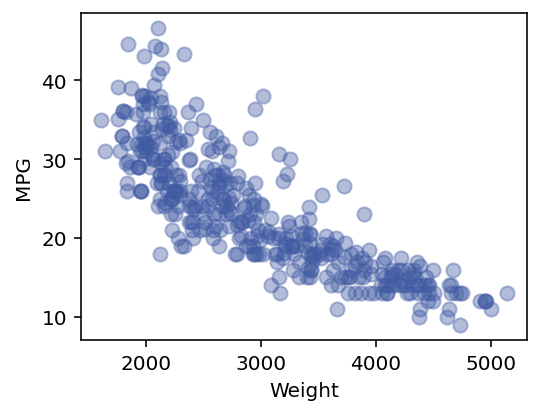

In [61]:
fig, ax = plt.subplots(figsize = (4, 3))

#low alpha in order to see distribution of points better
ax.scatter(df_cars["WGT"], df_cars["MPG"], s =50, c = '#415BA3', alpha = .4)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")

plt.show()

In [93]:
#can change color map to anything else matplotlib offers
col = "coolwarm"
cmap = plt.get_cmap(col)
cmap(0.0), cmap(1.0)

((0.2298057, 0.298717966, 0.753683153, 1.0),
 (0.705673158, 0.01555616, 0.150232812, 1.0))

In [90]:
#normalize values from df_cars['ENG'] from 0 to 1
col_name = "ENG"
norm = colors.Normalize(df_cars[col_name].min(), df_cars[col_name].max())
normed = norm(df_cars[col_name])
ycolor = cmap(normed)
ycolor[0:5] #(red, green, blue, alpha)

array([[0.95637093, 0.77514433, 0.68641595, 1.        ],
       [0.96380606, 0.63418841, 0.51372085, 1.        ],
       [0.96483536, 0.74461367, 0.64323888, 1.        ],
       [0.95276072, 0.7829648 , 0.69864577, 1.        ],
       [0.94915051, 0.79078527, 0.71087559, 1.        ]])

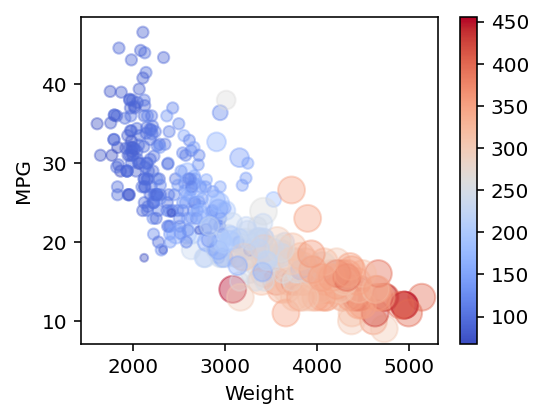

In [95]:
fig, ax = plt.subplots(figsize = (4, 3))

#add color map scale on the side
cool = plt.get_cmap(col)

#scatter plot showing 4 variables: 2 for the x and y position
#color by the engine type
#size indicates the number of cylinders
ax.scatter(df_cars["WGT"], df_cars["MPG"], s = df_cars["CYL"] **2.5, c = ycolor, alpha = .4)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")

#add color map scale on the side
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap = cool))

plt.show()

## Exercise 2

In [103]:
col = "twilight"
cmap = plt.get_cmap(col)
norm = colors.Normalize(df_cars["WGT"].min(), df_cars["WGT"].max())
weighted_color = norm(df_cars["WGT"])

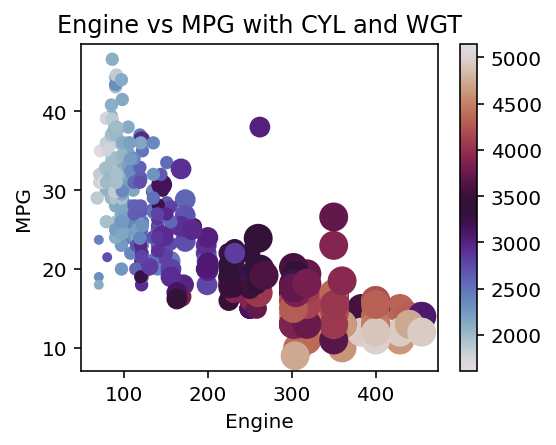

In [108]:
fig, ax = plt.subplots(figsize = (4, 3))

colorBar = plt.get_cmap(col)

ax.scatter(df_cars["ENG"], df_cars["MPG"], s = df_cars["CYL"] ** 2.5, 
           c = cmap(weighted_color))
ax.set_xlabel("Engine")
ax.set_ylabel("MPG")
ax.set_title("Engine vs MPG with CYL and WGT")

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap = colorBar))

plt.show()

## Histogram

In [119]:
def histo(ax, X, color = "#FEE08F", highlight=None): 
    n, bins, patches = ax.hist(X, color = color)
    ax.set_xlabel("Weight (lbs)")
    ax.set_ylabel("Count at that weight")
    ax.set_title("Pretty weight histogram")

    for i, rect in enumerate(patches):
        if highlight is not None and i == highlight: 
            rect.set_color('#73ADD2')
        rect.set_linewidth(0.5)
        rect.set_edgecolor('grey')

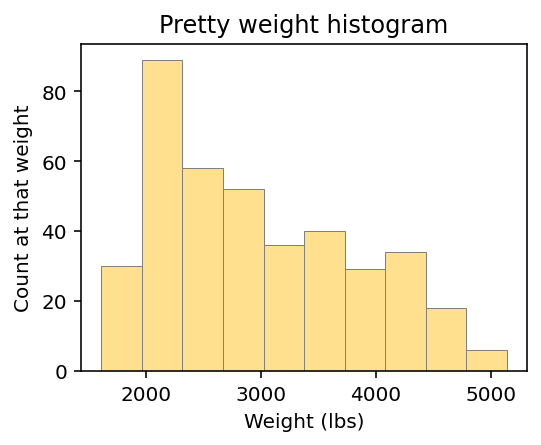

In [120]:
fig, ax = plt.subplots(figsize = (4, 3))
histo(ax, df_cars["WGT"])
plt.show()

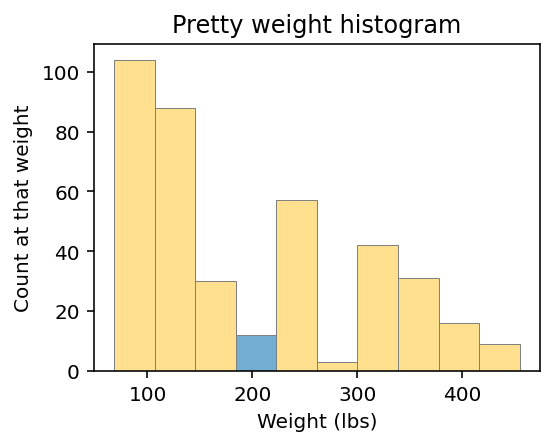

In [124]:
fig, ax = plt.subplots(figsize = (4, 3))
histo(ax, df_cars["ENG"], highlight = 3)
plt.show()

## Line Stuff

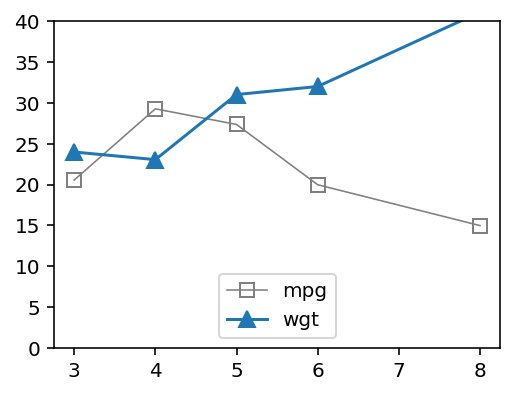

In [135]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.plot(cyl, avg_mpg, 's-', markersize = 7, c = 'grey', fillstyle = 'none', label = "mpg", lw = .8)
ax.plot(cyl, avg_wgt / 100, '^-', markersize = 8, label = "wgt", lw = 1.5)
ax.set_ylim(0, 40)

plt.legend(loc = 'lower center')
plt.show()

## Exercise 3

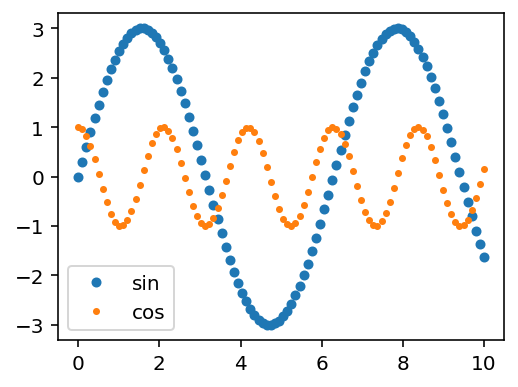

In [152]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.plot(x, y1, '.', markersize = 8, lw = .5, label = "sin")
ax.plot(x, y2, '.', markersize = 5, lw = 1.5, label = "cos")

plt.legend(loc = "lower left")
plt.show()

## Other Plot

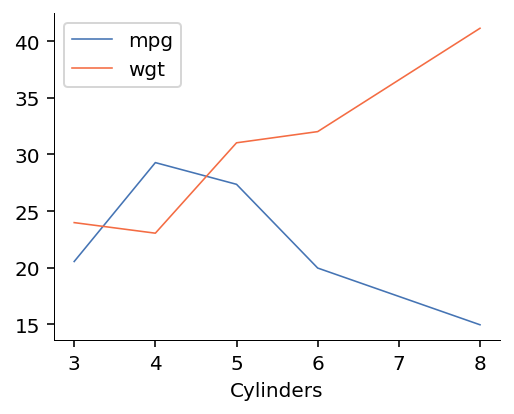

In [156]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.plot(cyl, avg_mpg, lw = .8, c = '#4574B4', label = 'mpg')
ax.plot(cyl, avg_wgt/100, lw = .8, c = '#F46C43', label = "wgt")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.set_xlabel("Cylinders")
plt.legend()
plt.show()

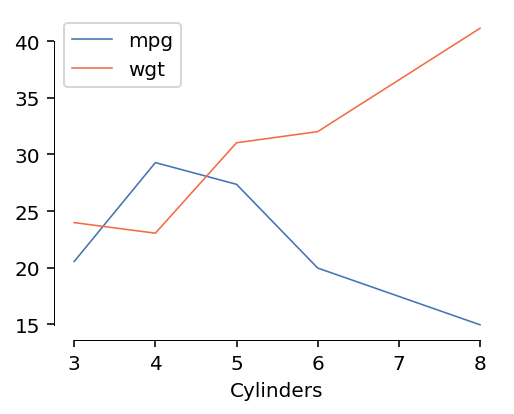

In [157]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.plot(cyl, avg_mpg, lw = .8, c = '#4574B4', label = 'mpg')
ax.plot(cyl, avg_wgt/100, lw = .8, c = '#F46C43', label = "wgt")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.spines['bottom'].set_bounds(3, 8)
ax.spines['left'].set_bounds(min(avg_mpg), 40)

ax.set_xlabel("Cylinders")
plt.legend()
plt.show()

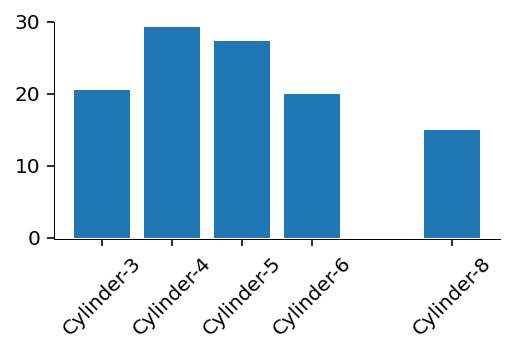

In [170]:
fig, ax = plt.subplots(figsize = (4, 2))

ax.bar(cyl, avg_mpg)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
#ax.set_xlabel("Cylinders")
ax.set_ylim(-.2, 30)

ax.set_xticks(cyl)
#how to set strings in list comprehension
ax.set_xticklabels([f"Cylinder-{n}" for n in cyl], rotation = 45)
plt.show()

In [177]:
cyl_ = cyl[0:2]
avg_mpg = avg_mpg[0:2]

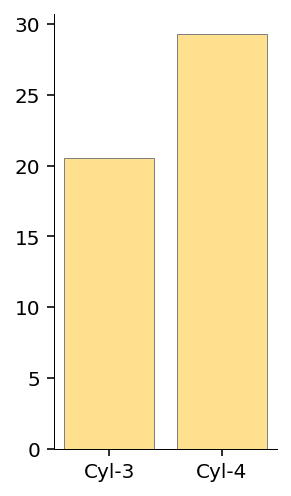

In [183]:
fig, ax = plt.subplots(figsize = (2, 4))

barcontainers = ax.bar(cyl_, avg_mpg, color = '#FEE08F')#, width = .2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

for rect in barcontainers.patches: 
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

ax.set_xticks(cyl_)
ax.set_xticklabels([f"Cyl-{n}" for n in cyl_])
plt.show()

## Exercise 4

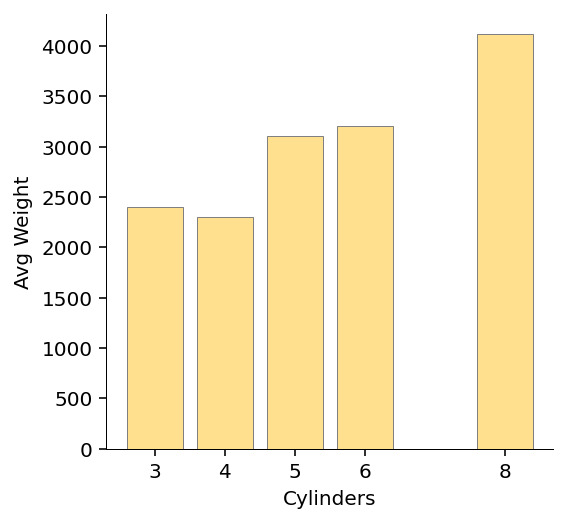

In [193]:
fig, ax = plt.subplots(figsize = (4, 4))

bars = ax.bar(cyl, avg_wgt, color = '#FEE08F')

for rect in bars.patches: 
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.set_xticks(cyl)
ax.set_yticklabels([n for n in np.arange(0, 4001, 500)])
ax.set_xticklabels([n for n in cyl])
ax.set_ylabel("Avg Weight")
ax.set_xlabel("Cylinders")

plt.show()

## Multi-bar chart

In [194]:
high = np.array([ 337, 628,   722,  636,  649,  510,  351])
med  = np.array([ 969, 1950, 2077, 1886, 1905, 1479,  942])
low  = np.array([2866, 5643, 6425, 5521, 4897, 4845, 3179])

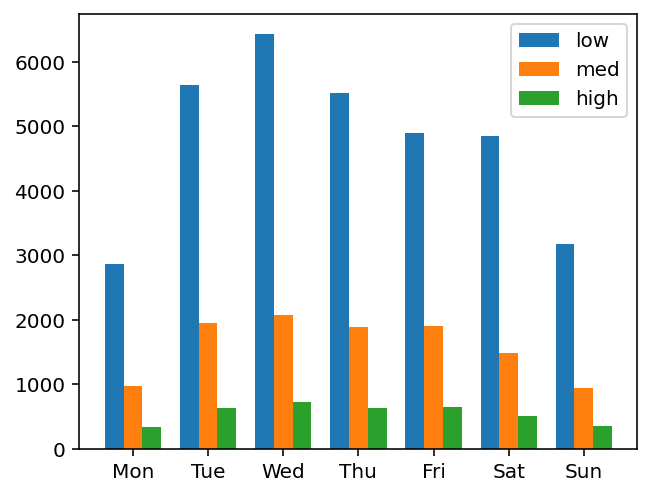

In [206]:
fig, ax = plt.subplots(figsize = (5, 4))

w = .25
ax.bar(np.arange(7) - w, low, width = w, label = "low")
ax.bar(np.arange(7), med, width = w, label = "med")
ax.bar(np.arange(7) + w, high, width = w, label = "high")

ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', "Thu", 'Fri', "Sat", 'Sun'])

plt.legend()
plt.show()

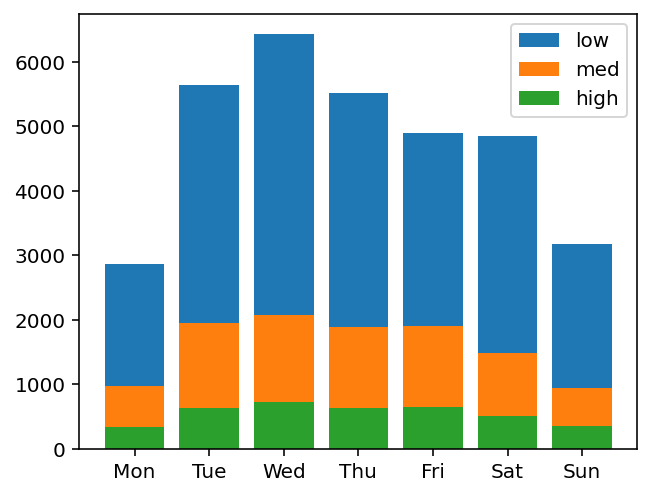

In [210]:
fig, ax = plt.subplots(figsize = (5, 4))

w = 1.0
ax.bar(np.arange(7), low, label = "low")
ax.bar(np.arange(7), med, label = "med")
ax.bar(np.arange(7), high, label = "high")

ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', "Thu", 'Fri', "Sat", 'Sun'])

plt.legend()
plt.show()